In [815]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [816]:
matricula = pd.read_csv("data/Matricula_Admisión2023/ArchivoMatr_Adm2023.csv", sep=";")

In [817]:
inscripcion = pd.read_csv("data/Inscritos_Admisión2023/ArchivoB_Adm2023.csv", sep=";")

In [818]:
df = pd.merge(matricula, inscripcion, on='ID_aux', how='left')

In [819]:
df

,ID_aux,CODIGO_UNIV,CODIGO,VIA,PREFERENCIA,PTJE_POND,TIPO_MATRICULA,ANYO_PROCESO,SEXO,RBD,...,CODIGO_REGION,CODIGO_PROVINCIA,CODIGO_COMUNA,CODIGO_REGION_D,CODIGO_COMUNA_D,SITUACION_EGRESO,BEA,PACE,PAIS_NACIMIENTO,INGRESO_PERCAPITA_GRUPO_FA
0,id_267832678788,30,30055,1,1,513.60,1,2023,1,NaN,...,NaN,NaN,NaN,9,9101,5,NaN,NaN,210,4
1,id_016130170616,45,45021,1,1,565.85,1,2023,2,20510.0,...,13.0,131.0,13127.0,13,13127,1,NaN,NaN,210,2
2,id_514305173430,56,56524,1,3,724.70,1,2023,2,1676.0,...,5.0,51.0,5109.0,5,5801,5,NaN,NaN,210,2
3,id_042500470254,47,47303,1,1,697.60,1,2023,2,11284.0,...,6.0,61.0,6101.0,6,6101,1,BEA,NaN,210,1
4,id_699806974987,45,45009,1,2,722.00,1,2023,1,9981.0,...,13.0,131.0,13119.0,13,13108,5,NaN,NaN,210,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111292,id_8198841548154,32,32012,1,1,591.45,1,2023,2,22270.0,...,10.0,103.0,10301.0,10,10301,1,NaN,NaN,156,2
111293,id_7666786944704,50,50201,1,1,580.50,1,2023,2,22434.0,...,10.0,101.0,10101.0,10,10101,5,NaN,NaN,290,5
111294,id_7666786243268,32,32055,1,1,733.50,3,2023,1,7331.0,...,10.0,103.0,10301.0,10,10301,5,NaN,NaN,290,8
111295,id_7666786649432,51,51185,1,9,593.40,1,2023,1,8518.0,...,13.0,131.0,13106.0,13,13201,5,NaN,NaN,244,1


In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111297 entries, 0 to 111296
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID_aux                      111297 non-null  object 
 1   CODIGO_UNIV                 111297 non-null  int64  
 2   CODIGO                      111297 non-null  int64  
 3   VIA                         111297 non-null  int64  
 4   PREFERENCIA                 111297 non-null  int64  
 5   PTJE_POND                   111297 non-null  float64
 6   TIPO_MATRICULA              111297 non-null  int64  
 7   ANYO_PROCESO                111297 non-null  int64  
 8   SEXO                        111297 non-null  int64  
 9   RBD                         110768 non-null  float64
 10  COD_ENS                     110768 non-null  float64
 11  REGIMEN                     103122 non-null  float64
 12  RAMA_EDUCACIONAL            110768 non-null  object 
 13  GRUPO_DEPENDEN

## Procesamiento de nombres y etiquetas

In [821]:
df['VIA'] = df['VIA'].replace({1: 'Regular', 2: 'BEA', 3: 'PACE'})

In [822]:
df['TIPO_MATRICULA'] = df['TIPO_MATRICULA'].replace({1: 'Postulación regular', 2: 'Repostulación', 3: 'Oficio de Sistema',
                                                     4: 'BEA', 5:'Oficio Acuerdo', 6:'PACE', 8:'Pedagogía', 9:'Pedagogía',
                                                    10:'Pegagogía'})

In [823]:
df['SEXO'] = df['SEXO'].replace({1: 'Hombre', 2: 'Mujer'})

In [824]:
df['REGIMEN'] = df['REGIMEN'].replace({1: 'Masculino', 2: 'Femenino', 3:'Coeducacional'})

In [825]:
df['RAMA_EDUCACIONAL'] = df['RAMA_EDUCACIONAL'].replace({'H1': 'Humanista cientifico Diurno', 
                                                         'H2': 'Humanista científico Nocturno',
                                                         'H3': 'Humanista científico - validación de estudios',
                                                         'H4': 'Humanista científico - Reconocimiento de estudios',
                                                         'T1': 'Técnico profesional comercial',
                                                         'T2': 'Técnico profesional Industrial',
                                                         'T3': 'Técnico profesional Servicios y técnica',
                                                         'T4': 'Técnico profesional agrícola',
                                                         'T5': 'Técnico profesional Marítima'                                           
                                                         })

In [826]:
df['GRUPO_DEPENDENCIA'] = df['GRUPO_DEPENDENCIA'].replace({1: 'Particular pagado', 2: 'Particular subvencionado', 
                                                           3: 'Municipal', 4: 'Servicio local de educación'})

In [827]:
df['INGRESO_PERCAPITA_GRUPO_FA'] = df['INGRESO_PERCAPITA_GRUPO_FA'].replace({1: '1° decil', 2:'2° decil', 3:'3° decil', 4:'4° decil',
                                                                             5: '5° decil', 6:'6° decil', 7:'7° decil', 8:'8° decil',
                                                                             9:'9° decil', 10:'10° decil', 99: 'Prefiero no responder'})

In [828]:
df['SITUACION_EGRESO'] = df['SITUACION_EGRESO'].replace({1:'Promoción del Año: Nacional – alumno regular',
                                                                             2:'Promoción del Año: Nacional – validación de estudios',
                                                                             3:'Promoción del Año: Extranjero – con algún curso en Chile',
                                                                             4:'Promoción del Año: Extranjero – no acredita notas',
                                                                             5:'Promoción Anterior: Nacional –  alumno regular',
                                                                             6:'Promoción Anterior: Nacional – validación de estudios',
                                                                             7:'Promoción Anterior Extranjero – con algún curso en Chile',
                                                                             8:'Promoción Anterior Extranjero – no acredita notas'})

In [829]:
## Ahora comenzaremos a traernos los códigos para universidad y regiones/comunas/etc. 

codigouniversidad = pd.read_excel("data/Matricula_Admisión2023/Libro_CódigosADM2023_ArchivoMatricula.xlsx", sheet_name=1)
codigolocalidades = pd.read_excel("data/Inscritos_Admisión2023/Libro_CódigosADM2023_ArchivoB.xlsx", sheet_name=2)

In [830]:
diccionario_universidades = pd.Series(codigouniversidad['UNIVERSIDAD'].values, index=codigouniversidad['UNI_CODIGO']).to_dict()
df['UNIVERSIDAD'] = df['CODIGO_UNIV'].map(diccionario_universidades)

## Corrección nombre Universidad de las Américas
df['UNIVERSIDAD'] = df['UNIVERSIDAD'].replace('UNIVERSIDAD DE LAS AMÃ‰RICAS','UNIVERSIDAD DE LAS AMÉRICAS')

In [831]:
diccionario_regiones = pd.Series(codigolocalidades['REGION NOMBRE'].values, index=codigolocalidades['COD REG.']).to_dict()
diccionario_provincias = pd.Series(codigolocalidades['PRV NOMBRE'].values, index=codigolocalidades['COD.PRV']).to_dict()
diccionario_comunas = pd.Series(codigolocalidades['COM NOMBRE'].values, index=codigolocalidades['COD.COMUNA']).to_dict()

In [832]:
df['REGION_ESTABLECIMIENTO_EGRESO'] = df['CODIGO_REGION'].map(diccionario_regiones)
df['PROVINCIA_ESTABLECIMIENTO_EGRESO'] = df['CODIGO_PROVINCIA'].map(diccionario_provincias)
df['COMUNA_ESTABLECIMIENTO_EGRESO'] = df['CODIGO_COMUNA'].map(diccionario_comunas)
df['REGION_POSTULANTE'] = df['CODIGO_REGION_D'].map(diccionario_regiones)
df['COMUNA_POSTULANTE'] = df['CODIGO_COMUNA_D'].map(diccionario_comunas)

In [833]:
## Eliminación de los códigos
df = df.drop(['CODIGO_UNIV', 'CODIGO_PROVINCIA', 'CODIGO_COMUNA', 'CODIGO_REGION_D', 'CODIGO_COMUNA_D', 'CODIGO_REGION'], axis=1)
df

,ID_aux,CODIGO,VIA,PREFERENCIA,PTJE_POND,TIPO_MATRICULA,ANYO_PROCESO,SEXO,RBD,COD_ENS,...,BEA,PACE,PAIS_NACIMIENTO,INGRESO_PERCAPITA_GRUPO_FA,UNIVERSIDAD,REGION_ESTABLECIMIENTO_EGRESO,PROVINCIA_ESTABLECIMIENTO_EGRESO,COMUNA_ESTABLECIMIENTO_EGRESO,REGION_POSTULANTE,COMUNA_POSTULANTE
0,id_267832678788,30055,Regular,1,513.60,Postulación regular,2023,Hombre,NaN,NaN,...,NaN,NaN,210,4° decil,UNIVERSIDAD DE LA FRONTERA,NaN,NaN,NaN,REGION DE LA ARAUCANIA,TEMUCO
1,id_016130170616,45021,Regular,1,565.85,Postulación regular,2023,Mujer,20510.0,363.0,...,NaN,NaN,210,2° decil,UNIVERSIDAD ALBERTO HURTADO,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,RECOLETA,REGION METROPOLITANA DE SANTIAGO,RECOLETA
2,id_514305173430,56524,Regular,3,724.70,Postulación regular,2023,Mujer,1676.0,310.0,...,NaN,NaN,210,2° decil,UNIVERSIDAD DE LAS AMÉRICAS,REGION DE VALPARAISO,VALPARAISO,VIÑA DEL MAR,REGION DE VALPARAISO,QUILPUE
3,id_042500470254,47303,Regular,1,697.60,Postulación regular,2023,Mujer,11284.0,363.0,...,BEA,NaN,210,1° decil,UNIVERSIDAD DE O'HIGGINS,REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS,CACHAPOAL,RANCAGUA,REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS,RANCAGUA
4,id_699806974987,45009,Regular,2,722.00,Postulación regular,2023,Hombre,9981.0,510.0,...,NaN,NaN,210,3° decil,UNIVERSIDAD ALBERTO HURTADO,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,MAIPU,REGION METROPOLITANA DE SANTIAGO,INDEPENDENCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111292,id_8198841548154,32012,Regular,1,591.45,Postulación regular,2023,Mujer,22270.0,610.0,...,NaN,NaN,156,2° decil,UNIVERSIDAD DE LOS LAGOS,REGION DE LOS LAGOS,OSORNO,OSORNO,REGION DE LOS LAGOS,OSORNO
111293,id_7666786944704,50201,Regular,1,580.50,Postulación regular,2023,Mujer,22434.0,310.0,...,NaN,NaN,290,5° decil,UNIVERSIDAD SAN SEBASTIAN,REGION DE LOS LAGOS,LLANQUIHUE,PUERTO MONTT,REGION DE LOS LAGOS,PUERTO MONTT
111294,id_7666786243268,32055,Regular,1,733.50,Oficio de Sistema,2023,Hombre,7331.0,410.0,...,NaN,NaN,290,8° decil,UNIVERSIDAD DE LOS LAGOS,REGION DE LOS LAGOS,OSORNO,OSORNO,REGION DE LOS LAGOS,OSORNO
111295,id_7666786649432,51185,Regular,9,593.40,Postulación regular,2023,Hombre,8518.0,310.0,...,NaN,NaN,244,1° decil,UNIVERSIDAD CENTRAL,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,ESTACION CENTRAL,REGION METROPOLITANA DE SANTIAGO,PUENTE ALTO


## Exploración variables

In [834]:
df

,ID_aux,CODIGO,VIA,PREFERENCIA,PTJE_POND,TIPO_MATRICULA,ANYO_PROCESO,SEXO,RBD,COD_ENS,...,BEA,PACE,PAIS_NACIMIENTO,INGRESO_PERCAPITA_GRUPO_FA,UNIVERSIDAD,REGION_ESTABLECIMIENTO_EGRESO,PROVINCIA_ESTABLECIMIENTO_EGRESO,COMUNA_ESTABLECIMIENTO_EGRESO,REGION_POSTULANTE,COMUNA_POSTULANTE
0,id_267832678788,30055,Regular,1,513.60,Postulación regular,2023,Hombre,NaN,NaN,...,NaN,NaN,210,4° decil,UNIVERSIDAD DE LA FRONTERA,NaN,NaN,NaN,REGION DE LA ARAUCANIA,TEMUCO
1,id_016130170616,45021,Regular,1,565.85,Postulación regular,2023,Mujer,20510.0,363.0,...,NaN,NaN,210,2° decil,UNIVERSIDAD ALBERTO HURTADO,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,RECOLETA,REGION METROPOLITANA DE SANTIAGO,RECOLETA
2,id_514305173430,56524,Regular,3,724.70,Postulación regular,2023,Mujer,1676.0,310.0,...,NaN,NaN,210,2° decil,UNIVERSIDAD DE LAS AMÉRICAS,REGION DE VALPARAISO,VALPARAISO,VIÑA DEL MAR,REGION DE VALPARAISO,QUILPUE
3,id_042500470254,47303,Regular,1,697.60,Postulación regular,2023,Mujer,11284.0,363.0,...,BEA,NaN,210,1° decil,UNIVERSIDAD DE O'HIGGINS,REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS,CACHAPOAL,RANCAGUA,REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS,RANCAGUA
4,id_699806974987,45009,Regular,2,722.00,Postulación regular,2023,Hombre,9981.0,510.0,...,NaN,NaN,210,3° decil,UNIVERSIDAD ALBERTO HURTADO,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,MAIPU,REGION METROPOLITANA DE SANTIAGO,INDEPENDENCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111292,id_8198841548154,32012,Regular,1,591.45,Postulación regular,2023,Mujer,22270.0,610.0,...,NaN,NaN,156,2° decil,UNIVERSIDAD DE LOS LAGOS,REGION DE LOS LAGOS,OSORNO,OSORNO,REGION DE LOS LAGOS,OSORNO
111293,id_7666786944704,50201,Regular,1,580.50,Postulación regular,2023,Mujer,22434.0,310.0,...,NaN,NaN,290,5° decil,UNIVERSIDAD SAN SEBASTIAN,REGION DE LOS LAGOS,LLANQUIHUE,PUERTO MONTT,REGION DE LOS LAGOS,PUERTO MONTT
111294,id_7666786243268,32055,Regular,1,733.50,Oficio de Sistema,2023,Hombre,7331.0,410.0,...,NaN,NaN,290,8° decil,UNIVERSIDAD DE LOS LAGOS,REGION DE LOS LAGOS,OSORNO,OSORNO,REGION DE LOS LAGOS,OSORNO
111295,id_7666786649432,51185,Regular,9,593.40,Postulación regular,2023,Hombre,8518.0,310.0,...,NaN,NaN,244,1° decil,UNIVERSIDAD CENTRAL,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,ESTACION CENTRAL,REGION METROPOLITANA DE SANTIAGO,PUENTE ALTO


In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111297 entries, 0 to 111296
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID_aux                            111297 non-null  object 
 1   CODIGO                            111297 non-null  int64  
 2   VIA                               111297 non-null  object 
 3   PREFERENCIA                       111297 non-null  int64  
 4   PTJE_POND                         111297 non-null  float64
 5   TIPO_MATRICULA                    111297 non-null  object 
 6   ANYO_PROCESO                      111297 non-null  int64  
 7   SEXO                              111297 non-null  object 
 8   RBD                               110768 non-null  float64
 9   COD_ENS                           110768 non-null  float64
 10  REGIMEN                           103122 non-null  object 
 11  RAMA_EDUCACIONAL                  110768 non-null  o

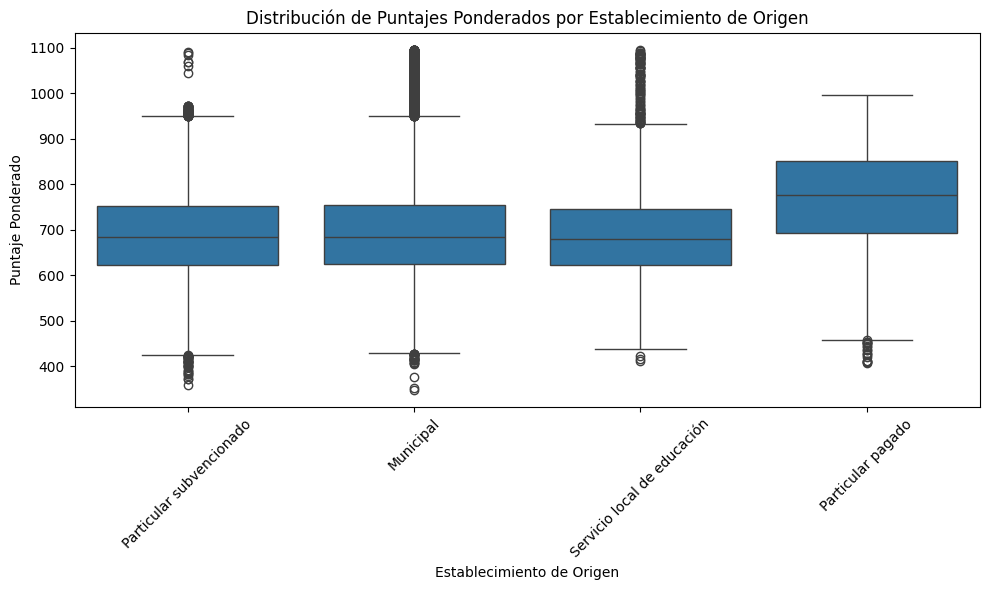

In [836]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GRUPO_DEPENDENCIA'], y=df['PTJE_POND'], data=df)
plt.xticks(rotation=45) 
plt.title('Distribución de Puntajes Ponderados por Establecimiento de Origen')
plt.xlabel('Establecimiento de Origen')
plt.ylabel('Puntaje Ponderado')
plt.tight_layout()
plt.show()

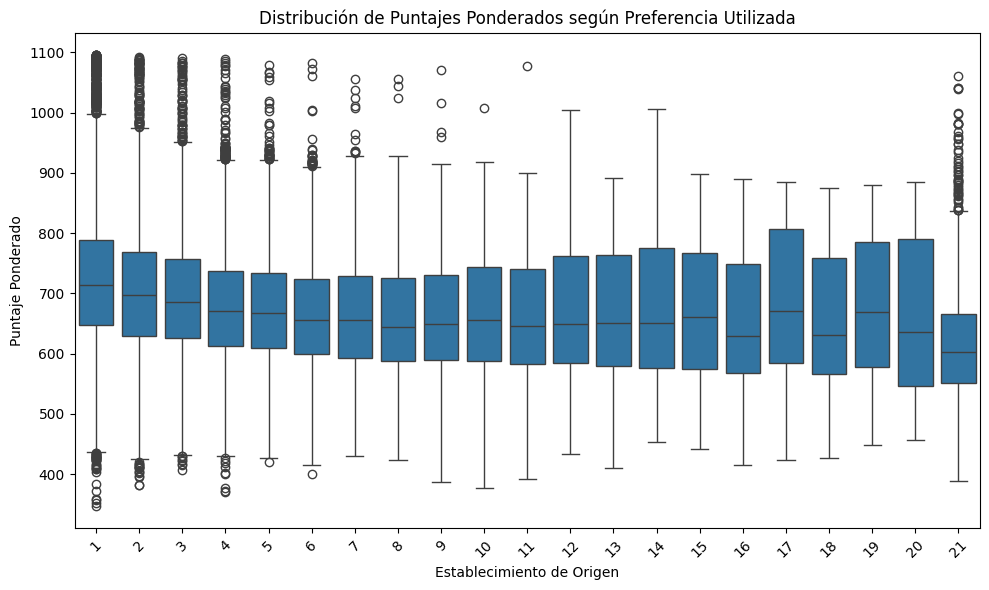

In [837]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PREFERENCIA'], y=df['PTJE_POND'], data=df)
plt.xticks(rotation=45) 
plt.title('Distribución de Puntajes Ponderados según Preferencia Utilizada')
plt.xlabel('Establecimiento de Origen')
plt.ylabel('Puntaje Ponderado')
plt.tight_layout()
plt.show()

In [838]:
bins = [0, 1, 2, 3, 4, 100] 
labels = [
    '1° preferencia', 
    '2° preferencia', 
    '3° preferencia', 
    '4° preferencia',
    '5° o más'
]

df['PREFERENCIA2'] = pd.cut(df['PREFERENCIA'], bins=bins, labels=labels, right=True)
df

,ID_aux,CODIGO,VIA,PREFERENCIA,PTJE_POND,TIPO_MATRICULA,ANYO_PROCESO,SEXO,RBD,COD_ENS,...,PACE,PAIS_NACIMIENTO,INGRESO_PERCAPITA_GRUPO_FA,UNIVERSIDAD,REGION_ESTABLECIMIENTO_EGRESO,PROVINCIA_ESTABLECIMIENTO_EGRESO,COMUNA_ESTABLECIMIENTO_EGRESO,REGION_POSTULANTE,COMUNA_POSTULANTE,PREFERENCIA2
0,id_267832678788,30055,Regular,1,513.60,Postulación regular,2023,Hombre,NaN,NaN,...,NaN,210,4° decil,UNIVERSIDAD DE LA FRONTERA,NaN,NaN,NaN,REGION DE LA ARAUCANIA,TEMUCO,1° preferencia
1,id_016130170616,45021,Regular,1,565.85,Postulación regular,2023,Mujer,20510.0,363.0,...,NaN,210,2° decil,UNIVERSIDAD ALBERTO HURTADO,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,RECOLETA,REGION METROPOLITANA DE SANTIAGO,RECOLETA,1° preferencia
2,id_514305173430,56524,Regular,3,724.70,Postulación regular,2023,Mujer,1676.0,310.0,...,NaN,210,2° decil,UNIVERSIDAD DE LAS AMÉRICAS,REGION DE VALPARAISO,VALPARAISO,VIÑA DEL MAR,REGION DE VALPARAISO,QUILPUE,3° preferencia
3,id_042500470254,47303,Regular,1,697.60,Postulación regular,2023,Mujer,11284.0,363.0,...,NaN,210,1° decil,UNIVERSIDAD DE O'HIGGINS,REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS,CACHAPOAL,RANCAGUA,REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS,RANCAGUA,1° preferencia
4,id_699806974987,45009,Regular,2,722.00,Postulación regular,2023,Hombre,9981.0,510.0,...,NaN,210,3° decil,UNIVERSIDAD ALBERTO HURTADO,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,MAIPU,REGION METROPOLITANA DE SANTIAGO,INDEPENDENCIA,2° preferencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111292,id_8198841548154,32012,Regular,1,591.45,Postulación regular,2023,Mujer,22270.0,610.0,...,NaN,156,2° decil,UNIVERSIDAD DE LOS LAGOS,REGION DE LOS LAGOS,OSORNO,OSORNO,REGION DE LOS LAGOS,OSORNO,1° preferencia
111293,id_7666786944704,50201,Regular,1,580.50,Postulación regular,2023,Mujer,22434.0,310.0,...,NaN,290,5° decil,UNIVERSIDAD SAN SEBASTIAN,REGION DE LOS LAGOS,LLANQUIHUE,PUERTO MONTT,REGION DE LOS LAGOS,PUERTO MONTT,1° preferencia
111294,id_7666786243268,32055,Regular,1,733.50,Oficio de Sistema,2023,Hombre,7331.0,410.0,...,NaN,290,8° decil,UNIVERSIDAD DE LOS LAGOS,REGION DE LOS LAGOS,OSORNO,OSORNO,REGION DE LOS LAGOS,OSORNO,1° preferencia
111295,id_7666786649432,51185,Regular,9,593.40,Postulación regular,2023,Hombre,8518.0,310.0,...,NaN,244,1° decil,UNIVERSIDAD CENTRAL,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,ESTACION CENTRAL,REGION METROPOLITANA DE SANTIAGO,PUENTE ALTO,5° o más


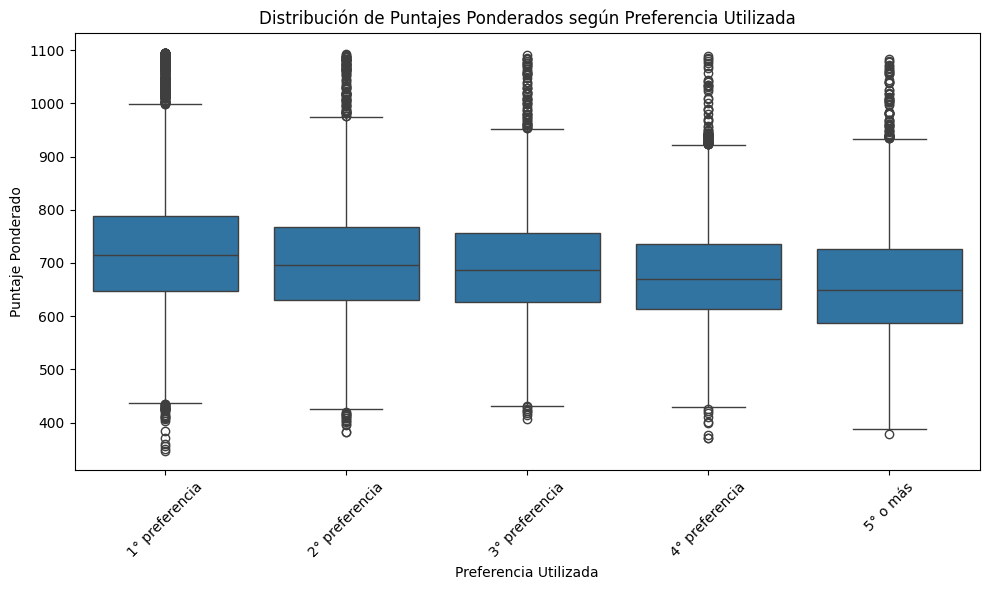

In [839]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PREFERENCIA2'], y=df['PTJE_POND'], data=df)
plt.xticks(rotation=45) 
plt.title('Distribución de Puntajes Ponderados según Preferencia Utilizada')
plt.xlabel('Preferencia Utilizada')
plt.ylabel('Puntaje Ponderado')
plt.tight_layout()
plt.show()

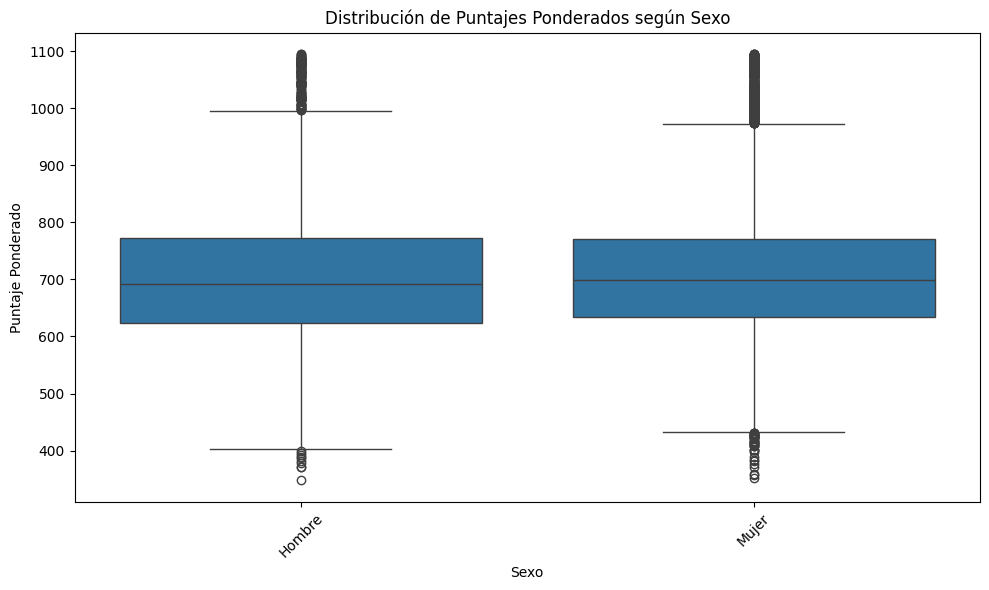

In [840]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SEXO'], y=df['PTJE_POND'], data=df)
plt.xticks(rotation=45) 
plt.title('Distribución de Puntajes Ponderados según Sexo')
plt.xlabel('Sexo')
plt.ylabel('Puntaje Ponderado')
plt.tight_layout()
plt.show()

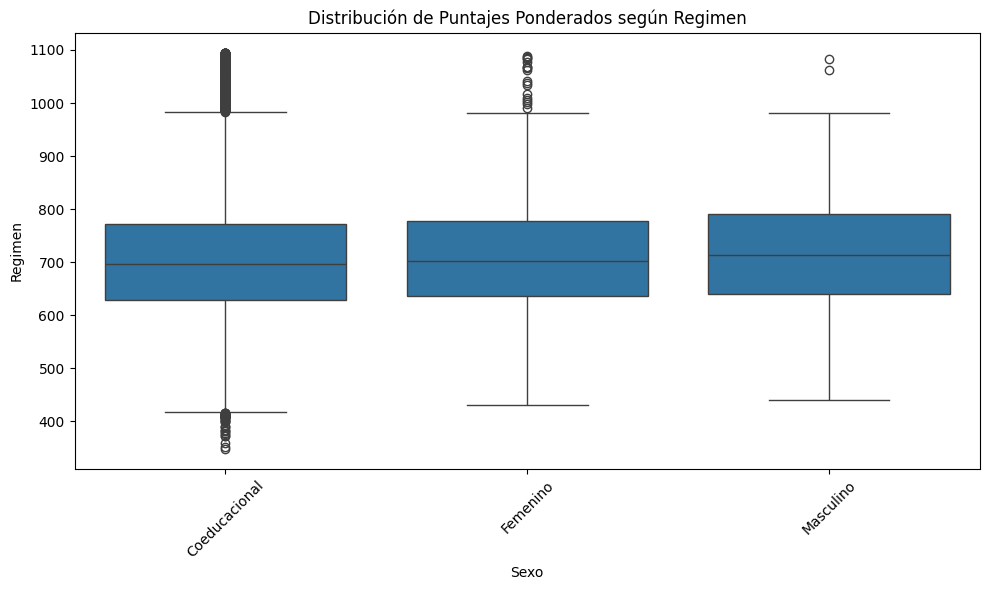

In [841]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['REGIMEN'], y=df['PTJE_POND'], data=df)
plt.xticks(rotation=45) 
plt.title('Distribución de Puntajes Ponderados según Regimen')
plt.xlabel('Sexo')
plt.ylabel('Regimen')
plt.tight_layout()
plt.show()

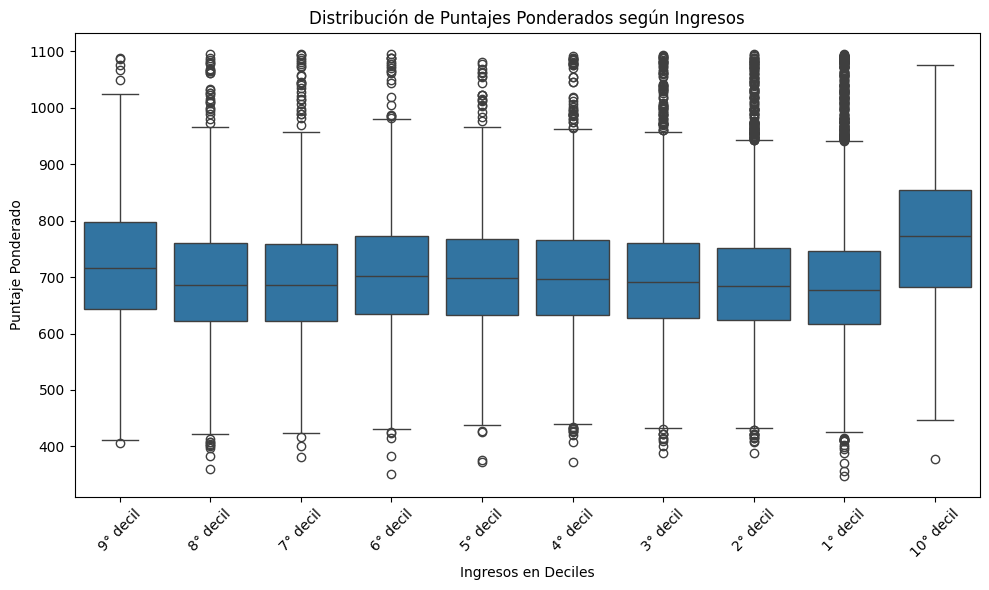

In [842]:
df_filtrado = df[df['INGRESO_PERCAPITA_GRUPO_FA'] != 'Prefiero no responder']
df_filtrado = df_filtrado.sort_values('INGRESO_PERCAPITA_GRUPO_FA', ascending=False)

# Crear el gráfico boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='INGRESO_PERCAPITA_GRUPO_FA', y='PTJE_POND', data=df_filtrado)
plt.xticks(rotation=45) 
plt.title('Distribución de Puntajes Ponderados según Ingresos')
plt.xlabel('Ingresos en Deciles')
plt.ylabel('Puntaje Ponderado')
plt.tight_layout() 
plt.show()

In [843]:
tabla_cruzada = pd.crosstab(df_filtrado['GRUPO_DEPENDENCIA'], df_filtrado['INGRESO_PERCAPITA_GRUPO_FA'])
tabla_cruzada

INGRESO_PERCAPITA_GRUPO_FA,10° decil,1° decil,2° decil,3° decil,4° decil,5° decil,6° decil,7° decil,8° decil,9° decil
GRUPO_DEPENDENCIA,,,,,,,,,,
Municipal,440,5750,4495,2781,2100,1501,1267,1494,1583,920
Particular pagado,4933,514,483,497,582,535,689,690,1037,1733
Particular subvencionado,1815,9413,8274,5920,4671,3727,3028,3462,3753,2872
Servicio local de educación,52,810,545,345,245,161,128,162,183,86


In [844]:
tabla_cruzada_p = pd.crosstab(df_filtrado['GRUPO_DEPENDENCIA'], df_filtrado['INGRESO_PERCAPITA_GRUPO_FA'])
porcentaje_columnas = tabla_cruzada_p.div(tabla_cruzada_p.sum(axis=0), axis=1) * 100
porcentaje_columnas

INGRESO_PERCAPITA_GRUPO_FA,10° decil,1° decil,2° decil,3° decil,4° decil,5° decil,6° decil,7° decil,8° decil,9° decil
GRUPO_DEPENDENCIA,,,,,,,,,,
Municipal,6.077348,34.875963,32.579546,29.141779,27.638852,25.337610,24.784820,25.723140,24.145821,16.396364
Particular pagado,68.135359,3.117608,3.500761,5.208006,7.659911,9.031060,13.478091,11.880165,15.817572,30.885760
Particular subvencionado,25.069061,57.093468,59.969559,62.034999,61.476704,62.913572,59.233177,59.607438,57.245272,51.185172
Servicio local de educación,0.718232,4.912962,3.950134,3.615215,3.224533,2.717758,2.503912,2.789256,2.791336,1.532704


In [845]:
comuna_puntajes = df.groupby('COMUNA_ESTABLECIMIENTO_EGRESO')['PTJE_POND'].mean()
top_10_comunas = comuna_puntajes.sort_values(ascending=False).head(10)
top_10_comunas.head(10)

COMUNA_ESTABLECIMIENTO_EGRESO
ERCILLA         923.831333
ALTO BIO-BIO    836.004286
LO BARNECHEA    800.794670
VITACURA        794.195761
ÑIQUEN          773.893409
RAUCO           773.643500
SAN ROSENDO     771.040923
PALENA          770.225000
LAS CONDES      765.599896
COBQUECURA      760.430250
Name: PTJE_POND, dtype: float64

In [846]:
moda_ingreso = df_filtrado.groupby('COMUNA_ESTABLECIMIENTO_EGRESO')['INGRESO_PERCAPITA_GRUPO_FA'].agg(lambda x: x.mode()[0])
comunas_deciles_10 = moda_ingreso[moda_ingreso == '10° decil']
conteo_deciles_10 = df_filtrado[df_filtrado['INGRESO_PERCAPITA_GRUPO_FA'] == '10° decil'].groupby('COMUNA_ESTABLECIMIENTO_EGRESO').size()

resultado_final = pd.DataFrame({
    'Moda': comunas_deciles_10,
    'Conteo': conteo_deciles_10
})

resultado_final = resultado_final.sort_values(by='Conteo', ascending=False)

resultado_final.head(10)

,Moda,Conteo
COMUNA_ESTABLECIMIENTO_EGRESO,,
LAS CONDES,10° decil,751
VITACURA,10° decil,434
LO BARNECHEA,10° decil,419
PROVIDENCIA,10° decil,389
LA REINA,10° decil,271
COLINA,10° decil,268
VIÑA DEL MAR,10° decil,231
SANTIAGO,NaN,231
PEÑALOLEN,10° decil,219


## Grafico - Geopandas

In [847]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

comunas_geo = gpd.read_file("data/comunas.shp")

Obtenemos el nombre de las regiones

In [848]:
comunas_geo["Region"].unique()

array(["Región del Libertador Bernardo O'Higgins",
       'Región de La Araucanía', 'Región Metropolitana de Santiago',
       'Región de Los Lagos', 'Región de Los Ríos', 'Región del Maule',
       'Región de Coquimbo', 'Región de Magallanes y Antártica Chilena',
       'Zona sin demarcar', 'Región de Valparaíso', 'Región del Bío-Bío',
       'Región de Aysén del Gral.Ibañez del Campo', 'Región de Tarapacá',
       'Región de Arica y Parinacota', 'Región de Antofagasta',
       'Región de Ñuble', 'Región de Atacama'], dtype=object)

In [849]:
# Se eliminan los registros con nan en la columna COMUNA_ESTABLECIMIENTO_EGRESO
datos_comuna = df.dropna(subset=["COMUNA_ESTABLECIMIENTO_EGRESO"])
# Se filtra el dataset para quedarnos solo con los registros de la reigión metropolitana
datos_comuna = datos_comuna[datos_comuna["REGION_ESTABLECIMIENTO_EGRESO"] == "REGION METROPOLITANA DE SANTIAGO"]
# Obtenemos la media del puntaje ponderado por comuna
datos_comuna = datos_comuna.groupby("COMUNA_ESTABLECIMIENTO_EGRESO")["PTJE_POND"].mean().round().reset_index()



Generamos el gráfico para ver si muestra alguna tendencia que nos pueda interesar

<Axes: >

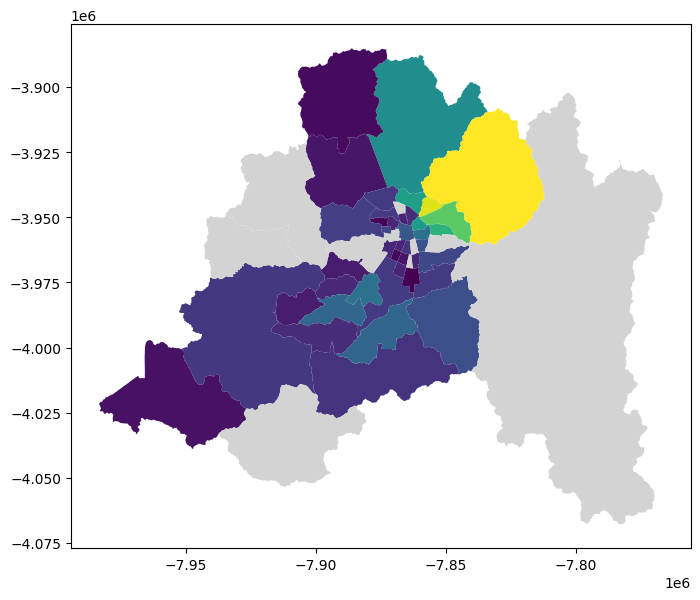

In [850]:
# Nos quedamos solo con los datos geograficos de la región metropolitana
comunas_metropolitana = comunas_geo[comunas_geo["Region"] == "Región Metropolitana de Santiago"]
# Transformamos los nombres de las comunas en mayúscula
comunas_metropolitana.loc[:, 'Comuna'] = comunas_metropolitana["Comuna"].str.upper()
# Realizamos un merge entre nuestro dataset y los datos geofraficos
df_grafico = pd.merge(comunas_metropolitana, datos_comuna, left_on='Comuna', right_on='COMUNA_ESTABLECIMIENTO_EGRESO', how='left')

gdf = gpd.GeoDataFrame(df_grafico, geometry='geometry')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

gdf.plot(
    column='PTJE_POND', 
    legend=False,  # Desactivamos la leyenda automática para agregar una manual 
    linewidth=0.3, 
    ax=ax, 
    missing_kwds={"color": "lightgrey", "label": "Datos faltantes"}
)

En principio si vemos patrones de colores diferentes concentrados en una zona de Santiago, lo que podría ser interesante de análizar, pero tenemos demaciadas comunas sin valores

Revisamos los dataframe para encontrar la causa de esto

In [851]:
comunas_metropolitana

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
26,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,SAN JOAQUÍN,Santiago,"POLYGON ((-7861762.687 -3958307.095, -7861708...."
36,331,13311.641304,13,7,13130,13,1.389538e+07,15988.816037,Región Metropolitana de Santiago,SAN MIGUEL,Santiago,"POLYGON ((-7863229.775 -3964360.652, -7863319...."
47,332,11733.486710,13,7,13131,13,9.056280e+06,14061.528858,Región Metropolitana de Santiago,SAN RAMÓN,Santiago,"POLYGON ((-7863398.118 -3964354.273, -7863319...."
57,309,11488.695747,9,7,13108,13,1.068637e+07,14088.417488,Región Metropolitana de Santiago,INDEPENDENCIA,Santiago,"POLYGON ((-7865631.125 -3948404.075, -7865643...."
61,310,12797.595762,13,7,13109,13,1.454185e+07,15442.412755,Región Metropolitana de Santiago,LA CISTERNA,Santiago,"POLYGON ((-7865040.615 -3968217.521, -7865077...."
68,323,36618.971695,11,7,13122,13,7.709271e+07,43954.336968,Región Metropolitana de Santiago,PEÑALOLÉN,Santiago,"POLYGON ((-7852667.025 -3963533.211, -7852700...."
82,324,16072.408276,10,7,13123,13,2.073083e+07,19223.740933,Región Metropolitana de Santiago,PROVIDENCIA,Santiago,"POLYGON ((-7857468.292 -3952687.257, -7857424...."
86,314,23724.899355,11,7,13113,13,3.361510e+07,28343.661508,Región Metropolitana de Santiago,LA REINA,Santiago,"POLYGON ((-7852374.608 -3952376.018, -7852375...."
90,295,44852.016431,14,7,13403,13,1.056188e+08,54017.559247,Región Metropolitana de Santiago,CALERA DE TANGO,Maipo,"POLYGON ((-7877355.549 -3971828.617, -7877326...."
109,288,172581.447530,8,7,13301,13,1.386968e+09,206660.187466,Región Metropolitana de Santiago,COLINA,Chacabuco,"POLYGON ((-7879353.625 -3919889.834, -7879390...."


In [852]:
datos_comuna

,COMUNA_ESTABLECIMIENTO_EGRESO,PTJE_POND
0,ALHUE,740.0
1,BUIN,708.0
2,CALERA DE TANGO,715.0
3,CERRILLOS,680.0
4,CERRO NAVIA,666.0
5,COLINA,731.0
6,CONCHALI,668.0
7,CURACAVI,674.0
8,EL BOSQUE,678.0
9,EL MONTE,675.0


Aquí podemos ver que existen diferencias en como se encuentran escritos los nombres de las comúnas, por ejemplo en el dataframe comunas_metropolitana se encuentra SAN JOAQUÍN pero en el dataframe datos_comuna este se encuentra sin tildes 

In [853]:
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('SAN JOAQUIN', 'SAN JOAQUÍN')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('SAN RAMON', 'SAN RAMÓN')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('PEÑALOLEN', 'PEÑALOLÉN')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('CURACAVI', 'CURACAVÍ')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('MARIA PINTO', 'MARÍA PINTO')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('CONCHALI', 'CONCHALÍ')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('ESTACION CENTRAL', 'ESTACIÓN CENTRAL')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('MAIPU', 'MAIPÚ')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('SAN JOSE DE MAIPO', 'SAN JOSÉ DE MAIPO')
datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'] = datos_comuna['COMUNA_ESTABLECIMIENTO_EGRESO'].replace('ALHUE', 'ALHUÉ')

Volvemos a realizar el merge

In [854]:
df_grafico = pd.merge(comunas_metropolitana, datos_comuna, left_on='Comuna', right_on='COMUNA_ESTABLECIMIENTO_EGRESO', how='left')

visualizamos el grafico

<Axes: >

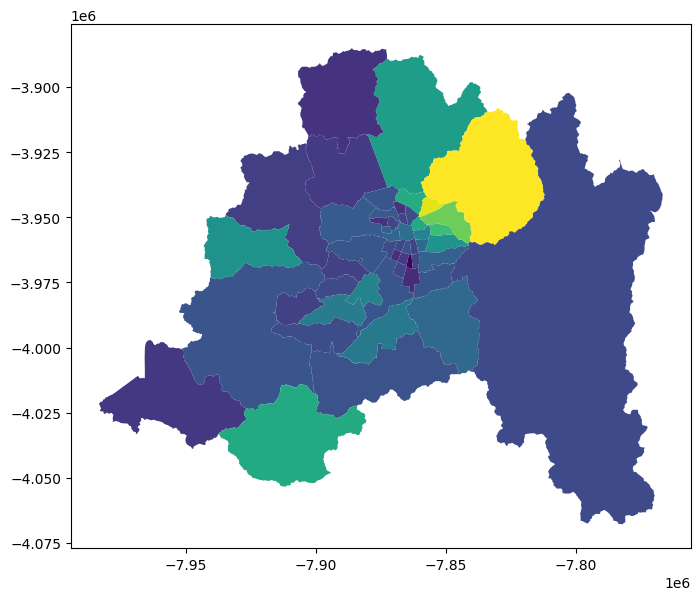

In [855]:
gdf = gpd.GeoDataFrame(df_grafico, geometry='geometry')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

gdf.plot(
    column='PTJE_POND', 
    legend=False,  # Desactivamos la leyenda automática para agregar una manual 
    linewidth=0.3, 
    ax=ax, 
    missing_kwds={"color": "lightgrey", "label": "Datos faltantes"}
)

en el gráfico observamos que no nos faltan datos para poder gráficar y parecen haber mayores puntajes en el sector oriente, pero con estos colores no estamos del todo seguros, así que revisamos el dataset directamente

In [856]:
df_grafico.sort_values(by=['PTJE_POND'], ascending=False).head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,COMUNA_ESTABLECIMIENTO_EGRESO,PTJE_POND
28,316,149539.074262,11,7,13115,13,1.469677e+09,180515.436695,Región Metropolitana de Santiago,LO BARNECHEA,Santiago,"POLYGON ((-7816562.382 -3924823.138, -7816577....",LO BARNECHEA,801.0
20,334,25316.046022,11,7,13132,13,4.123413e+07,30628.932436,Región Metropolitana de Santiago,VITACURA,Santiago,"POLYGON ((-7856867.838 -3942121.214, -7856812....",VITACURA,794.0
27,315,51230.563241,11,7,13114,13,1.416658e+08,61618.090148,Región Metropolitana de Santiago,LAS CONDES,Santiago,"POLYGON ((-7851625.483 -3946140.988, -7851625....",LAS CONDES,766.0
7,314,23724.899355,11,7,13113,13,3.361510e+07,28343.661508,Región Metropolitana de Santiago,LA REINA,Santiago,"POLYGON ((-7852374.608 -3952376.018, -7852375....",LA REINA,752.0
14,308,32111.265818,9,7,13107,13,6.431963e+07,38432.099760,Región Metropolitana de Santiago,HUECHURABA,Santiago,"POLYGON ((-7869094.986 -3944017.368, -7869086....",HUECHURABA,741.0


Una vez que hemos corroborado que los mejores puntajes ponderados provienen de establecimientos del sector oriente, procedemos a generar un gráfico más detallado que nos permita visualizar esto de forma clara

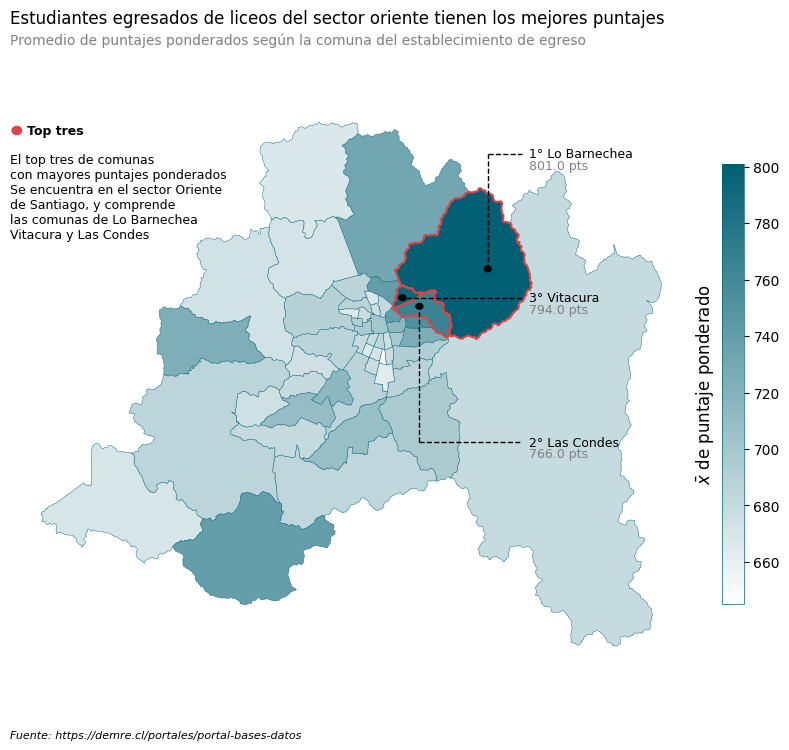

In [857]:
# Convertir el resultado en un GeoDataFrame
gdf = gpd.GeoDataFrame(df_grafico, geometry='geometry')


my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-005F73
    (0.000, (1.000, 1.000, 1.000)),
    (1.000, (0.000, 0.373, 0.451))))

# Convertir el resultado en un GeoDataFrame
gdf = gpd.GeoDataFrame(df_grafico, geometry='geometry')
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

top_3_comunas = gdf.nlargest(3, 'PTJE_POND')

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Graficar el mapa con los valores de cada comuna
gdf.plot(
    column='PTJE_POND', 
    cmap= my_gradient, 
    legend=False,  # Desactivamos la leyenda
    edgecolor='#005F73', 
    linewidth=0.3, 
    ax=ax, 
    missing_kwds={"color": "lightgrey", "label": "Datos faltantes"}
)

# Crear un objeto de leyenda manualmente
norm = mpl.colors.Normalize(vmin=gdf['PTJE_POND'].min(), vmax=gdf['PTJE_POND'].max())
sm = plt.cm.ScalarMappable(cmap=my_gradient, norm=norm)
sm.set_array([])  # Necesario para que funcione el colorbar

# Agregar la leyenda manualmente
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.ax.yaxis.set_label_position('left')
cbar.set_label(r'$\bar{x}$ de puntaje ponderado', fontsize=12)

cbar.outline.set_edgecolor('#005F73')
cbar.outline.set_linewidth(0.5) 


#Titulo
ax.text(0, 1.15, "Estudiantes egresados de liceos del sector oriente tienen los mejores puntajes", transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
#Subtitulo
ax.text(0, 1.11, "Promedio de puntajes ponderados según la comuna del establecimiento de egreso", transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='left', color='gray')


# Detacamos las comunas con los puntajes más altos con un borde grueso y color diferente
top_3_comunas.plot(
    ax=ax, 
    edgecolor='#DB444B', 
    linewidth=1.5, 
    facecolor='none',
    label='Top 5 Puntajes'
)

#Circulos
circle = patches.Circle((0.01, 0.94), 0.007,transform=ax.transAxes, color="#DB444B", zorder=5)
ax.add_patch(circle)

circle = patches.Circle((0.7, 0.7), 0.005,transform=ax.transAxes, color="black", zorder=5)
ax.add_patch(circle)

circle = patches.Circle((0.6, 0.635), 0.005,transform=ax.transAxes, color="black", zorder=5)
ax.add_patch(circle)

circle = patches.Circle((0.575, 0.65), 0.005,transform=ax.transAxes, color="black", zorder=5)
ax.add_patch(circle)

ax.text(0.025, 0.95, "Top tres", transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', fontweight='bold', color='black')
ax.text(0.0, 0.90, "El top tres de comunas" "\n" "con mayores puntajes ponderados" "\n" 
        "Se encuentra en el sector Oriente" "\n" "de Santiago, y comprende" "\n"  
        "las comunas de Lo Barnechea" "\n" "Vitacura y Las Condes", 
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='black')


# Lineas segmentadas
ax.plot([0.7, 0.7], [0.7, 0.9], transform=ax.transAxes, color='black', linestyle='--', linewidth=1)
ax.plot([0.6, 0.6], [0.4, 0.64], transform=ax.transAxes, color='black', linestyle='--', linewidth=1)
ax.plot([0.58, 0.75], [0.65, 0.65], transform=ax.transAxes, color='black', linestyle='--', linewidth=1)
ax.plot([0.7, 0.75], [0.9, 0.9], transform=ax.transAxes, color='black', linestyle='--', linewidth=1)
ax.plot([0.6, 0.75], [0.4, 0.4], transform=ax.transAxes, color='black', linestyle='--', linewidth=1)

ax.text(0.76, 0.91, "1° Lo Barnechea", transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='black')
ax.text(0.76, 0.89, "801.0 pts", transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='grey')

ax.text(0.76, 0.41, "2° Las Condes", transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='black')
ax.text(0.76, 0.39, "766.0 pts", transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='grey')

ax.text(0.76, 0.66, "3° Vitacura", transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='black')
ax.text(0.76, 0.64, "794.0 pts", transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='left', color='grey')


# Agregar referencia
ax.text(
    0.0, -0.1,
    'Fuente: https://demre.cl/portales/portal-bases-datos', 
    transform=ax.transAxes, 
    fontsize=8, 
    verticalalignment='top', 
    horizontalalignment='left', 
    style='italic'
)


# Eliminar ejes
ax.set_axis_off()

plt.tight_layout()
plt.show()